In [1]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df14 = pd.read_csv('log_9.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])


df14['percentage_wandering'] = 1-df14['percentage_lazy']

df14['adjusted_chance_of_selfishness'] = df14['chance_of_selfishness'] * df14['percentage_wandering']
df14['adjusted_chance_of_sharing'] = (1-df14['chance_of_selfishness']) * df14['percentage_wandering']

df14.loc[df14.num_agents == 20, 'num_agents'] = 19.999
df14['adjusted_fitness'] = (df14['num_agents'] * df14['avg_health']) / 20


percentage_lazy = df14['percentage_lazy']
coself = df14['adjusted_chance_of_selfishness']
cosharing = df14['adjusted_chance_of_sharing']
num_agents = df14['num_agents']
avg_health = df14['avg_health']
fitness = df14['adjusted_fitness']

In [3]:
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'white', 'lightcoral', 'red', 'darkred']
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

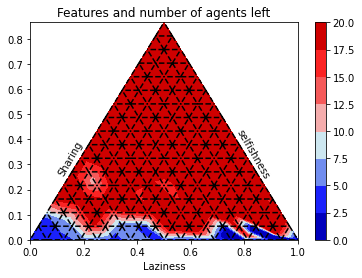

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

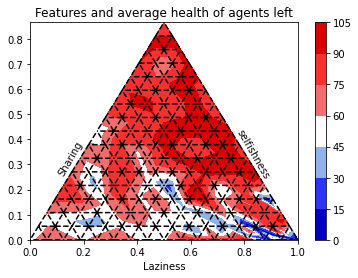

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

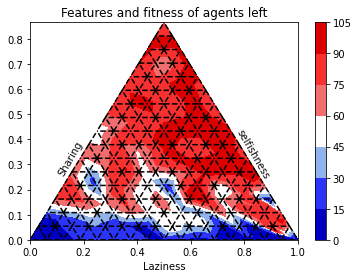

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [7]:
grouped_multiple = df14.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']



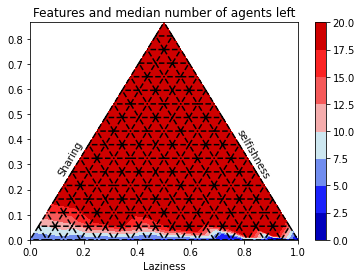

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [9]:
grouped_multiple = df14.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
avg_health = grouped_multiple['avg_health']
# avg_health = df4['avg_health']

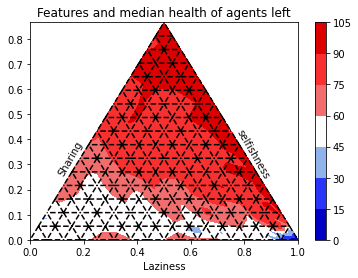

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [11]:
grouped_multiple = df14.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
# num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']
fitness = grouped_multiple['adjusted_fitness']

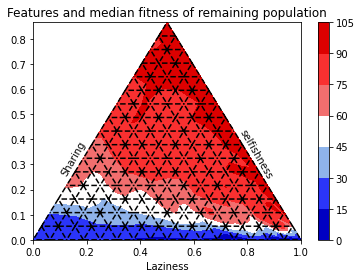

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of remaining population')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [13]:
df14.head()

,percentage_lazy,chance_of_selfishness,num_agents,avg_health,percentage_wandering,adjusted_chance_of_selfishness,adjusted_chance_of_sharing,adjusted_fitness
0,0.0,0.0,19.999,78.336806,1.0,0.0,1.0,78.332889
1,0.0,0.0,19.999,94.163194,1.0,0.0,1.0,94.158486
2,0.0,0.0,19.999,89.057222,1.0,0.0,1.0,89.052769
3,0.0,0.0,19.999,91.798611,1.0,0.0,1.0,91.794021
4,0.0,0.0,19.999,80.944444,1.0,0.0,1.0,80.940397


In [14]:
grouped_multiple.head()

,percentage_lazy,adjusted_chance_of_sharing,adjusted_chance_of_selfishness,adjusted_fitness
0,0.0,0.0,1.0,15.184514
1,0.0,0.1,0.9,22.672101
2,0.0,0.2,0.8,54.906907
3,0.0,0.3,0.7,67.359757
4,0.0,0.4,0.6,72.163197


In [15]:
df = df14

In [16]:
df['group'] = np.where(
    ((df.percentage_lazy > 0)&(df.percentage_lazy <= 0.3)) & (df.chance_of_selfishness <= 0.4), 
    'low-low',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'low-medium',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'low-high',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & (df.chance_of_selfishness <= 0.4), 
             'medium-low',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'medium-medium',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'medium-high',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & (df.chance_of_selfishness <= 0.4), 
             'high-low',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'high-medium',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'high-high',
             'extremes')))))))))


In [17]:
selfishness= df

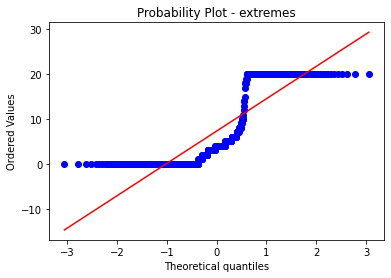

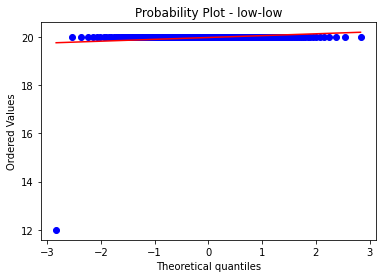

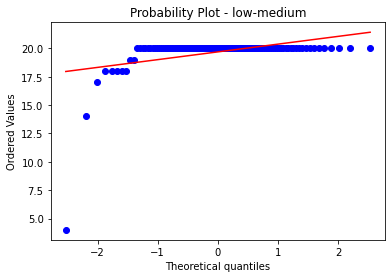

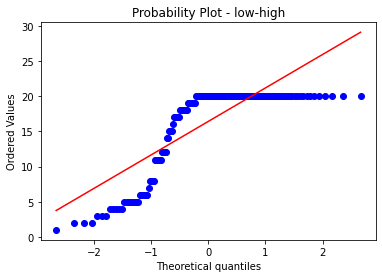

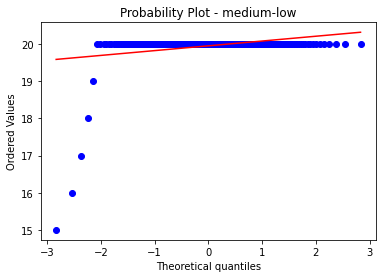

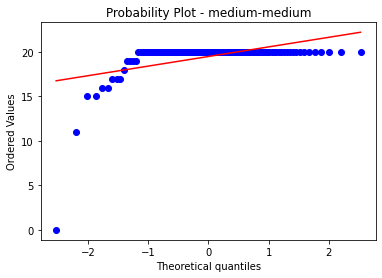

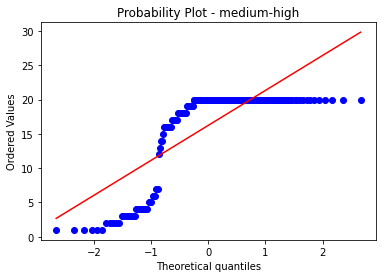

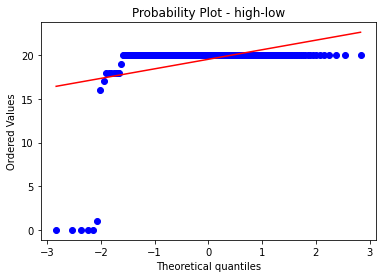

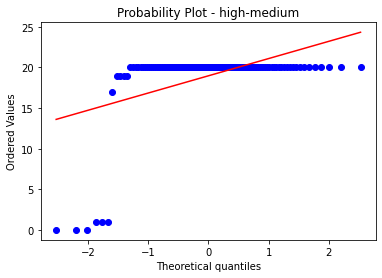

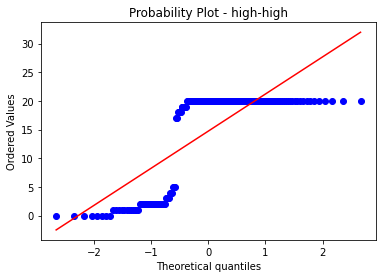

In [18]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

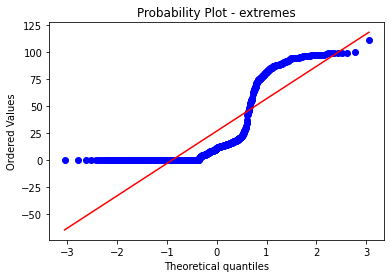

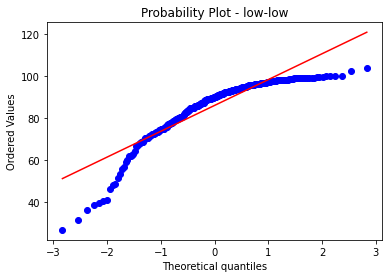

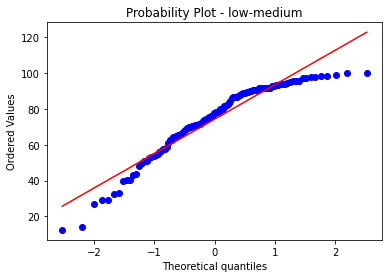

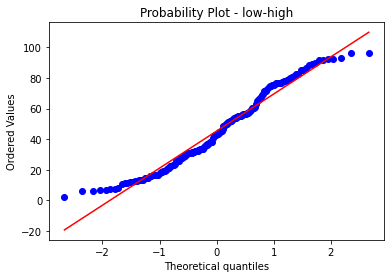

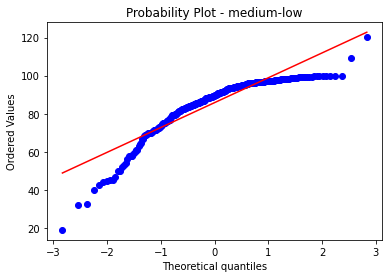

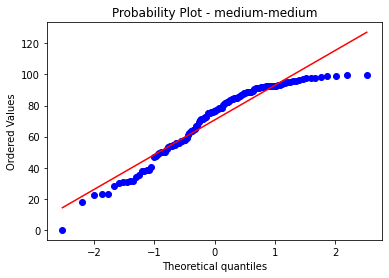

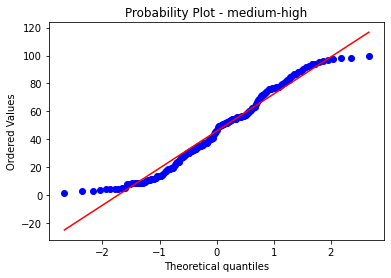

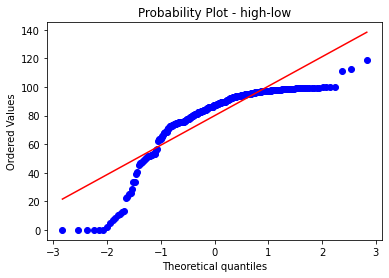

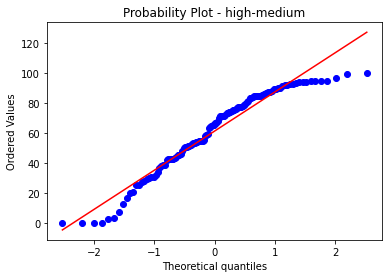

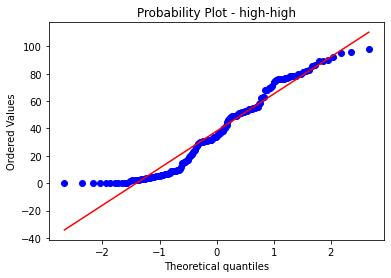

In [19]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['adjusted_fitness'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

# Poisson

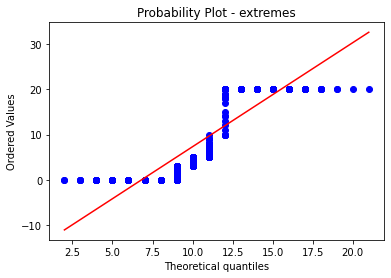

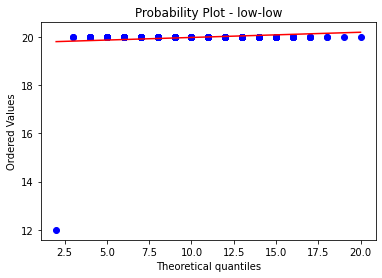

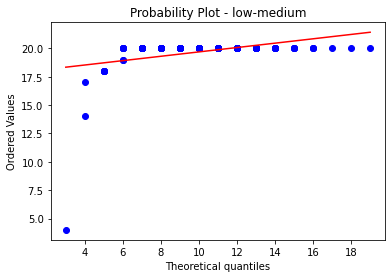

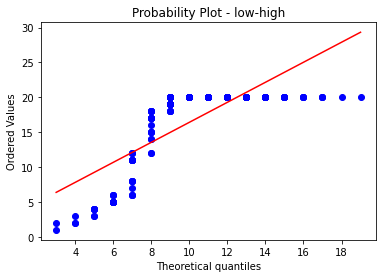

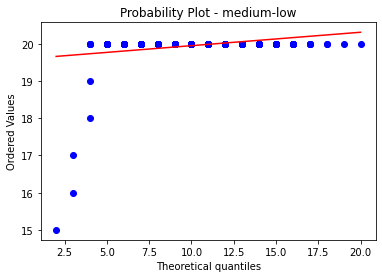

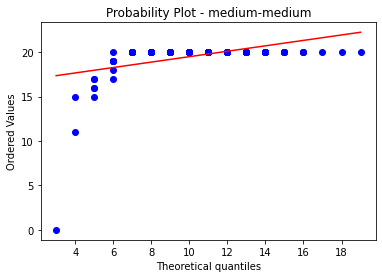

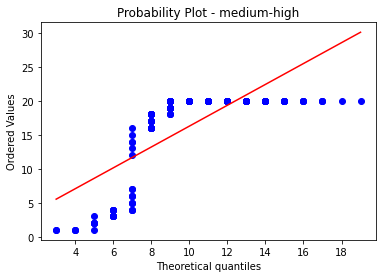

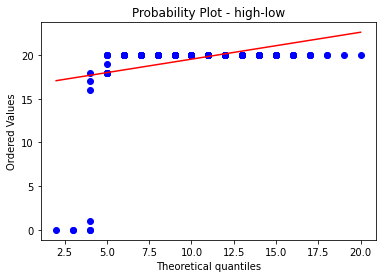

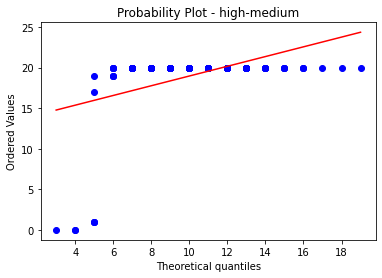

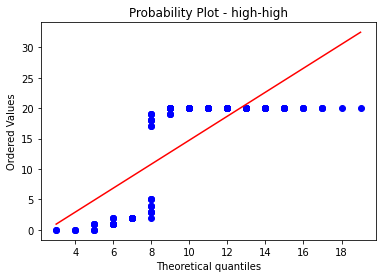

In [19]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['num_agents'], dist=stats.poisson(mu=10), plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [20]:
ratio = selfishness.groupby('group').std().max() / selfishness.groupby('group').std().min()
ratio

percentage_lazy                    5.428192
chance_of_selfishness              6.975734
num_agents                        19.603323
avg_health                         2.752522
percentage_wandering               5.428192
adjusted_chance_of_selfishness     9.655639
adjusted_chance_of_sharing        12.642633
adjusted_fitness                   2.595090
dtype: float64

In [21]:
selfishness2 = selfishness

In [22]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = selfishness2['num_agents'].mean()
SSTR = selfishness2.groupby('group').count() * (selfishness2.groupby('group').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['num_agents'].sum()

# calculate SSE and update anova table
SSE = (selfishness2.groupby('group').count() - 1) * selfishness2.groupby('group').std()**2
anova_table['SS']['Within Groups'] = SSE['num_agents'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['num_agents'].sum() + SSE['num_agents'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = selfishness2['group'].nunique() - 1
anova_table['df']['Within Groups'] = selfishness2.shape[0] - selfishness2['group'].nunique()
anova_table['df']['Total'] = selfishness2.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,64156.3,9,7128.47,232.171,1.11022e-16,2.11892
Within Groups,73995.6,2410,30.7036,,,
Total,138152,2419,57.1112,,,


In [23]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 232.17075417288282  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 232.17075417288282  and critical value is: 2.1189183955352764
Null Hypothesis is rejected.


In [24]:
from scipy import stats

df = df[['group', 'num_agents']]

x = df.loc[df['group'] == 'low-low']['num_agents'].tolist()
xx = df.loc[df['group'] == 'low-medium']['num_agents'].tolist()
xxx = df.loc[df['group'] == 'low-high']['num_agents'].tolist()
y = df.loc[df['group'] == 'medium-low']['num_agents'].tolist()
yy = df.loc[df['group'] == 'medium-medium']['num_agents'].tolist()
yyy = df.loc[df['group'] == 'medium-high']['num_agents'].tolist()
z = df.loc[df['group'] == 'high-low']['num_agents'].tolist()
zz = df.loc[df['group'] == 'high-medium']['num_agents'].tolist()
zzz = df.loc[df['group'] == 'high-high']['num_agents'].tolist()

stats.kruskal(x,xx, xxx, y, yy, yyy, z,zz, zz)

KruskalResult(statistic=353.531092703369, pvalue=1.5963625714991657e-71)

In [25]:
data = [x, xx, xxx, y, yy, yyy, z, zz, zzz]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9
1,1.000000e+00,1.000000e+00,3.668647e-31,1.000000e+00,1.907926e-01,1.996775e-29,1.000000e+00,6.920046e-01,3.262412e-26
2,1.000000e+00,1.000000e+00,2.969223e-13,1.000000e+00,1.000000e+00,2.416629e-12,1.000000e+00,1.000000e+00,1.131139e-10
3,3.668647e-31,2.969223e-13,1.000000e+00,2.758266e-29,1.104816e-10,1.000000e+00,6.975877e-24,5.519623e-12,1.000000e+00
4,1.000000e+00,1.000000e+00,2.758266e-29,1.000000e+00,4.877163e-01,1.327937e-27,1.000000e+00,1.000000e+00,1.712154e-24
5,1.907926e-01,1.000000e+00,1.104816e-10,4.877163e-01,1.000000e+00,7.291191e-10,1.000000e+00,1.000000e+00,2.278063e-08
6,1.996775e-29,2.416629e-12,1.000000e+00,1.327937e-27,7.291191e-10,1.000000e+00,2.304736e-22,4.061185e-11,1.000000e+00
7,1.000000e+00,1.000000e+00,6.975877e-24,1.000000e+00,1.000000e+00,2.304736e-22,1.000000e+00,1.000000e+00,1.436844e-19
8,6.920046e-01,1.000000e+00,5.519623e-12,1.000000e+00,1.000000e+00,4.061185e-11,1.000000e+00,1.000000e+00,1.564821e-09
9,3.262412e-26,1.131139e-10,1.000000e+00,1.712154e-24,2.278063e-08,1.000000e+00,1.436844e-19,1.564821e-09,1.000000e+00
